In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ComplexNets import *

# Loading experimentally measured Dataset

In [2]:
data=np.load('./data/experimental_dataset.npy',allow_pickle=True).tolist()
x1=data['x1']
x2=data['x2']
y=data['y']

Converting complex data into real and imaginary data

In [3]:
x1t=complex_to_channels_np(np.array(x1)) 
x2t=complex_to_channels_np(np.array(x2)) 

# Loading Bases in which data is taken, as well as the transformation due to 2f lens sytem (F)

In [4]:
F=np.load('./data/experimental_F.npy',allow_pickle=True)

# Contructing the model

In [5]:
F_tf=tf.constant(F.astype(np.complex64))

x1m = keras.Input(shape=(x1.shape[1],2,)) #input layer at plane 1
x2m = keras.Input(shape=(x2.shape[1],2,)) #input layer at plane 2

Tm=ComplexDense(x2.shape[1], use_bias=False) # Initialising TM layer

#transfer of input layers to output layer
y1=Tm(x1m)
y2= channels_to_complex(x2m)*channels_to_complex(y1)
ym=complex_to_channels(y2@F_tf)
iout=Amplitude()(ym)**2

#init model
model = keras.models.Model(inputs=[x1m,x2m], outputs=iout)

# Training

In [6]:
lr=1e4

model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr) , loss=['mse','MeanAbsolutePercentageError'],  metrics=['acc','mape'])

reduce_lr = ReduceLROnPlateau(monitor='acc', factor=0.4,
                              patience=4, min_lr=lr/10,#baseline=0.9,
                              verbose=1)
history=model.fit([x1t,x2t], 
                  y,
                  validation_split=0.01,
                  epochs=20,
                  batch_size=500,#*npl//5,
                  verbose=1,shuffle=False,
                 callbacks = [reduce_lr],
                 )

Epoch 1/20
24/24 [==============================] - 2s 41ms/step - loss: 1.1775e-05 - acc: 0.0068 - mape: 100.0000 - val_loss: 1.1741e-05 - val_acc: 0.0085 - val_mape: 99.9997
Epoch 2/20
24/24 [==============================] - 0s 16ms/step - loss: 1.1772e-05 - acc: 0.0109 - mape: 99.9784 - val_loss: 1.1585e-05 - val_acc: 0.0339 - val_mape: 98.5689
Epoch 3/20
24/24 [==============================] - 0s 13ms/step - loss: 9.8906e-06 - acc: 0.0356 - mape: 89.4122 - val_loss: 3.4192e-06 - val_acc: 0.2966 - val_mape: 55.7723
Epoch 4/20
24/24 [==============================] - 0s 15ms/step - loss: 2.7259e-06 - acc: 0.4329 - mape: 52.4654 - val_loss: 1.8142e-06 - val_acc: 0.5678 - val_mape: 46.4663
Epoch 5/20
24/24 [==============================] - 0s 13ms/step - loss: 1.7566e-06 - acc: 0.5691 - mape: 45.9803 - val_loss: 1.7329e-06 - val_acc: 0.5254 - val_mape: 45.7969
Epoch 6/20
24/24 [==============================] - 0s 13ms/step - loss: 1.6811e-06 - acc: 0.5858 - mape: 45.3096 - val_loss

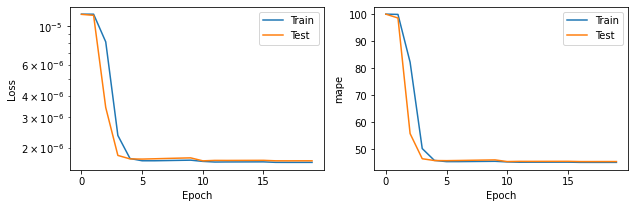

In [7]:
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.yscale('log')
plt.legend(['Train', 'Test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.ylabel('mape')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

Get the TM from the weights of the model

In [8]:
Tl=channels_to_complex_np(np.array(Tm.get_weights()[0]) )

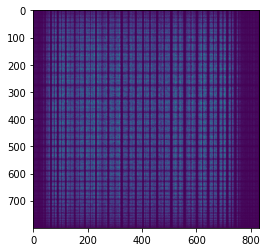

In [9]:
plt.imshow(np.abs(Tl))

In [ ]:
)